In [4]:
#import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import os
os.getcwd()

'/Users/veronikastuchlikova/Desktop/python'

In [ ]:
#PART 1

In [8]:
aptv = pd.read_csv("/Users/veronikastuchlikova/Desktop/python/data/APTV.csv")
fe = pd.read_csv("/Users/veronikastuchlikova/Desktop/python/data/FE.csv")
mar = pd.read_csv("/Users/veronikastuchlikova/Desktop/python/data/MAR.csv")
mrna = pd.read_csv("/Users/veronikastuchlikova/Desktop/python/data/MRNA.csv")
wab = pd.read_csv("/Users/veronikastuchlikova/Desktop/python/data/WAB.csv")

In [9]:
companies = {"aptv": aptv, "fe": fe, "mar": mar, "mrna": mrna, "wab": wab}

In [10]:
for df in companies.values():
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    print(df.dtypes)

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [11]:
companies.items()

dict_items([('aptv',               Open    High     Low   Close   Volume  Dividends  Stock Splits
Date                                                                        
2017-01-03  55.113  55.771  54.122  54.869  2462471        0.0           0.0
2017-01-04  54.999  57.038  54.975  56.900  2954465        0.0           0.0
2017-01-05  56.819  56.843  56.007  56.551  2373116        0.0           0.0
2017-01-06  56.811  56.811  56.153  56.194  1699309        0.0           0.0
2017-01-09  56.259  56.372  55.251  55.292  3023897        0.0           0.0
...            ...     ...     ...     ...      ...        ...           ...
2022-12-23  90.810  91.690  89.820  91.260  1304200        0.0           0.0
2022-12-27  91.070  92.480  90.140  91.500   921900        0.0           0.0
2022-12-28  91.600  91.800  90.060  90.280  1412200        0.0           0.0
2022-12-29  91.990  93.970  91.760  93.810  1189800        0.0           0.0
2022-12-30  92.760  93.590  91.980  93.130   951600    

In [17]:
#1
for c, df in companies.items():
    if sum(df["High"] == df["Low"]) == df.shape[0]:
            print(f"the company {c} has no difference between High and Low columns")
#all of the companies have some difference between High and Low columns 
#I checked by also switching "==" for "!=" and all of the companies were listed in that case
#stock trading - low volatility?

In [26]:
#2
for c, df in companies.items():
    lowest_price = df["High"].min()
    highest_price = df["High"].max()
    print(f"the company {c} has Lowest price: {lowest_price} and highest price: {highest_price} ")

the company aptv has Lowest price: 45.36 and highest price: 180.81 
the company fe has Lowest price: 20.735 and highest price: 43.604 
the company mar has Lowest price: 63.016 and highest price: 190.77 
the company mrna has Lowest price: 12.69 and highest price: 497.49 
the company wab has Lowest price: 41.765 and highest price: 111.04 


In [32]:
#for c, df in companies.items():
#    highest_price_date = df["High"].idxmax()
#    lowest_price_date = df["High"].idxmin()
#    lowest_price = df.loc[lowest_price_date, "High"]
#    highest_price = df.loc[highest_price_date, "High"]
#    print(f"the company {c} has Lowest price: {lowest_price} and highest price: {highest_price} ")

In [31]:
#3
import numpy as np

for c, df in companies.items():
    df["Log_Returns"] = np.log(df["Close"] / df["Close"].shift(1))
    min_c = df["Log_Returns"].min()
    max_c = df["Log_Returns"].max()
    median_c = df["Log_Returns"].median()
    mean_c = df["Log_Returns"].mean()
    std_c = df["Log_Returns"].std()
    skew_c = df["Log_Returns"].skew()
    print("----")
    print(f"For company {c} the log returns show: maximum of {max_c} and minimum is {min_c}.")
    print(f"maximum: {max_c}")
    print(f"minimum: {min_c}")
    print(f"mean: {mean_c}")
    print(f"median: {median_c}")
    print(f"std. dev: {median_c}")
    print(f"skewness: {median_c}")
    

----
For company aptv the log returns show: maximum of 0.19023847097997792 and minimum is -0.3646017151486247.
maximum: 0.19023847097997792
minimum: -0.3646017151486247
mean: 0.00035059499040687036
median: 0.0007668123985891107
std. dev: 0.0007668123985891107
skewness: 0.0007668123985891107
----
For company fe the log returns show: maximum of 0.15647235491929357 and minimum is -0.2345002300929536.
maximum: 0.15647235491929357
minimum: -0.2345002300929536
mean: 0.0003666446696870528
median: 0.0012005500735205491
std. dev: 0.0012005500735205491
skewness: 0.0012005500735205491
----
For company mar the log returns show: maximum of 0.17800166991786767 and minimum is -0.1647774370303768.
maximum: 0.17800166991786767
minimum: -0.1647774370303768
mean: 0.00042371309332338986
median: 0.0007548178054097046
std. dev: 0.0007548178054097046
skewness: 0.0007548178054097046
----
For company mrna the log returns show: maximum of 0.2453796927610916 and minimum is -0.19804739909941882.
maximum: 0.245379

In [38]:
#4
for c, df in companies.items():
    nd_highest_price = df["Log_Returns"].nlargest(2)
    lowest_price = df["Log_Returns"].min()
    df.remove(lowest_price)
    nd_lowest_pric = df["Log_Returns"].min()
  
    print(f"the company {c} has 2nd Lowest price: {nd_lowest_price} and 2nd highest price: {nd_highest_price}")

AttributeError: 'DataFrame' object has no attribute 'remove'

In [41]:
#5
for c, df in companies.items():
    weekly_volume = df["Volume"].resample("W").median()

    print(f"Median weekly volume for {c}:")
    print(weekly_volume)
    print("---")

Median weekly volume for aptv:
Date
2017-01-08    2417793.5
2017-01-15    3023897.0
2017-01-22    2281612.5
2017-01-29    2467482.0
2017-02-05    2763465.0
                ...    
2022-12-04    1707600.0
2022-12-11    1847100.0
2022-12-18    2465900.0
2022-12-25    1705900.0
2023-01-01    1070700.0
Freq: W-SUN, Name: Volume, Length: 313, dtype: float64
---
Median weekly volume for fe:
Date
2017-01-08    3621100.0
2017-01-15    4802300.0
2017-01-22    4306000.0
2017-01-29    3936000.0
2017-02-05    4584500.0
                ...    
2022-12-04    3138200.0
2022-12-11    2790700.0
2022-12-18    3119700.0
2022-12-25    2194100.0
2023-01-01    1357750.0
Freq: W-SUN, Name: Volume, Length: 313, dtype: float64
---
Median weekly volume for mar:
Date
2017-01-08    3052650.0
2017-01-15    2281600.0
2017-01-22    2281850.0
2017-01-29    1693400.0
2017-02-05    2241700.0
                ...    
2022-12-04    1856400.0
2022-12-11    1898200.0
2022-12-18    2464700.0
2022-12-25    1837200.0
2023-01-0

In [64]:
#6
lowest_return_company = None
lowest_return = float('-inf')

for c, df in companies.items():
    total_return = (df["Close"].iloc[-1]/df["Close"].iloc[0])-1
    print(f"{c}: Total Return = {total_return:.2%}")

#The lowest return was made by WAB

aptv: Total Return = 69.73%
fe: Total Return = 73.89%
mar: Total Return = 89.53%
mrna: Total Return = 865.70%
wab: Total Return = 23.24%


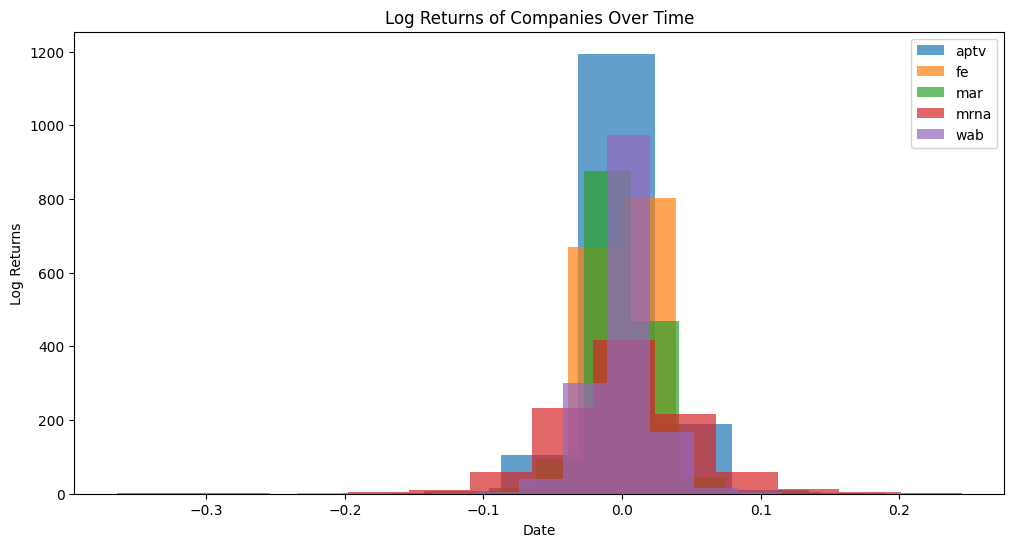

In [66]:
#8
plt.figure(figsize=(12, 6)) 
for c, df in companies.items():
    if "Log_Returns" in df.columns:
        plt.hist(df["Log_Returns"], label=c, alpha=0.7)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns of Companies Over Time")
plt.show()



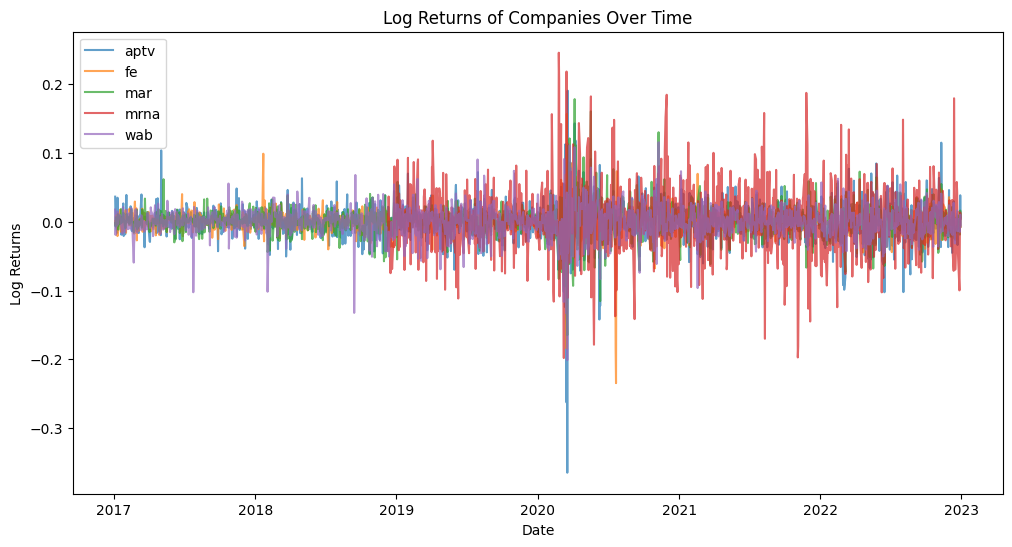

In [63]:
#8
plt.figure(figsize=(12, 6))  

for c, df in companies.items():
    if "Log_Returns" in df.columns:
        plt.plot(df.index, df["Log_Returns"], label=c, alpha=0.7)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns of Companies Over Time")
plt.show()





In [ ]:
# PART 2

In [50]:
data_pt2 = pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")

In [54]:
#1
data_pt2["included"].isnull().sum()

45

In [56]:
data_clean = data_pt2.dropna(subset = "included")

In [61]:
#data_pt2
data_clean

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


In [68]:
#2
data_clean["included"] = pd.to_datetime(data_clean["included"], dayfirst = True, errors = "coerce")

/var/folders/kj/_sd3m1gj4rz9y0qfzsjrn6tr0000gn/T/ipykernel_53945/803101150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["included"] = pd.to_datetime(data_clean["included"], dayfirst = True, errors = "coerce")


(array([], dtype=float64), [])

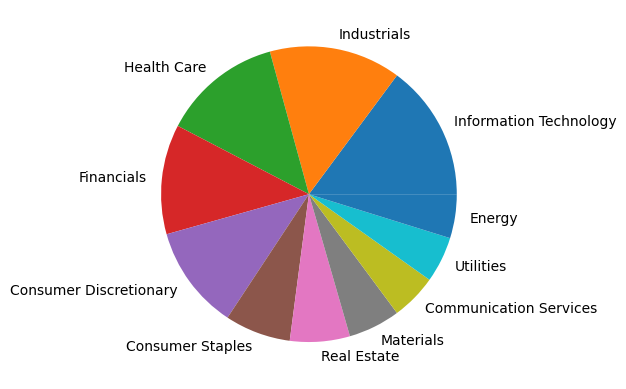

In [69]:
#3
sector = data_clean["GICS_Sector"].value_counts().reset_index()
plt.pie(sector["count"], labels= sector["GICS_Sector"])
plt.xticks(rotation = 90)

In [78]:
#4
data_clean["state"] =  data_clean['hq'].str.split(",", expand = True)[1]

/var/folders/kj/_sd3m1gj4rz9y0qfzsjrn6tr0000gn/T/ipykernel_53945/1301574798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["state"] =  data_clean['hq'].str.split(",", expand = True)[1]


In [80]:
#5
data_2 = pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv")
data_2

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [82]:
merged = data_clean.merge(data_2, on = "Symbol", how = "left")
merged

,Symbol,Security,GICS_Sector,hq,included,Founded,state,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,Minnesota,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,Wisconsin,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,Illinois,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),Illinois,Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,Massachusetts,Health Care Equipment
...,...,...,...,...,...,...,...,...
453,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06,1997,Kentucky,Restaurants
454,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23,1969,Illinois,Electronic Equipment & Instruments
455,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07,1927,Indiana,Health Care Equipment
456,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22,1873,Utah,Regional Banks


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Health Care Equipment'),
  Text(1, 0, 'Pharmaceuticals'),
  Text(2, 0, 'Biotechnology'),
  Text(3, 0, 'Life Sciences Tools & Services'),
  Text(4, 0, 'Managed Health Care'),
  Text(5, 0, 'Health Care Supplies'),
  Text(6, 0, 'Health Care Distributors'),
  Text(7, 0, 'Health Care Services'),
  Text(8, 0, 'Health Care Facilities')])

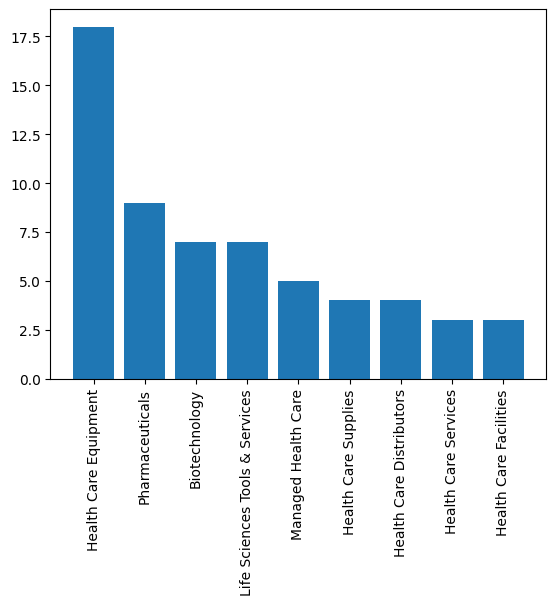

In [92]:
dt= merged.loc[merged["GICS_Sector"] == "Health Care", "subindustry"].value_counts().reset_index()
plt.bar(dt["subindustry"], dt["count"])
plt.xticks(rotation = 90)

In [ ]:
#PART 3

In [95]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
x = np.random.uniform(mu, 1000)


[-6.15148401e-02  3.74513812e-02 -1.20394127e-01  1.09905032e-01
  8.39506523e-02 -6.53690060e-02 -7.49596467e-02 -6.92981719e-02
 -5.67011641e-02 -3.24901858e-02  3.74097483e-02  6.96787957e-02
  6.82355088e-02 -2.46844169e-02  2.23608211e-02  1.54064313e-01
  6.61735825e-02 -1.44173453e-01  1.30355944e-01  6.32057156e-02
  2.17848544e-02  2.04076284e-02 -2.43887190e-01  1.08087328e-01
  1.23771732e-01  1.06763658e-01  1.53895290e-01  1.74118714e-01
 -1.02166663e-01  1.78191358e-01  3.50363608e-02  1.13281391e-01
  4.79984071e-02  4.35482735e-02 -4.17937124e-02 -1.61977249e-01
  1.76643714e-02 -1.50078350e-01  1.16960168e-01 -6.39417154e-03
 -3.41384201e-02  1.21661639e-01 -1.43188973e-02  1.70257344e-01
 -1.24383658e-01 -3.13160614e-02  1.15596804e-01  2.39320044e-02
  1.54795544e-01 -5.21580506e-02  1.21479320e-01  1.78221070e-01
 -2.07207297e-02 -8.14417514e-04  1.10488660e-01  1.41375904e-01
  9.94372818e-02  1.67624641e-01 -2.20405079e-01 -1.59257390e-01
  3.96478451e-02 -9.54643